In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from lmfit import Parameters, minimize, fit_report

output_dir = os.getcwd()

In [2]:
# to contain all the data into one place
# only need to run if we have new data
import pickle

data_dict = {
    "etiso8_njet0_qcd37_2665":[
        "39.4784 +/- 0.0423736 GeV", "41.2451 +/- 0.0444014 GeV", 
        "41.8106 +/- 0.0405521 GeV", "42.3605 +/- 0.0459407 GeV", 
        "42.9221 +/- 0.0473117 GeV", " 43.5305 +/- 0.0404663 GeV", 
        "45.2309 +/- 0.0425886 GeV"
    ],   # base case
    "ptw10_qcd37_2665":[
        "39.2923 +/- 0.0657924 GeV", "40.8123 +/- 0.0700304 GeV", 
        "41.35 +/- 0.0666937 GeV", "41.9307 +/- 0.0749529 GeV",
        "42.5712 +/- 0.0852238 GeV", "43.1116 +/- 0.0712354 GeV",
        "44.5412 +/- 0.103191 GeV"
    ],
    "ptw10_njet0_qcd37_2665":[
        "39.3337 +/- 0.0703365 GeV", "40.8565 +/- 0.074536 GeV",
        "41.3975 +/- 0.0712035 GeV", "41.9311 +/- 0.0781514 GeV",
        "42.5656 +/- 0.0894602 GeV", "43.1147 +/- 0.0762419 GeV",
        "44.5398 +/- 0.103191 GeV" 
    ],
    "etiso8_njet0_qcd40_2665":[
        "39.92 +/- 0.0492164 GeV", "41.5872 +/- 0.0467629 GeV",
        "42.1024 +/- 0.0420073 GeV", "42.656 +/- 0.0448077 GeV",
        "43.2608 +/- 0.0474972 GeV", "43.6906 +/- 0.0403156 GeV",
        "45.3482 +/- 0.044938 GeV"
    ],
    "etiso8_njet0_qcd35_2665":[
        "40.1088 +/- 0.0464933 GeV", "41.6698 +/- 0.0437758 GeV",
        "42.1306 +/- 0.0419964 GeV", "42.7606 +/- 0.0471991 GeV",
        "43.3321 +/- 0.049122 GeV", "43.719 +/- 0.0410752 GeV",
        "45.3724 +/- 0.046614 GeV"
    ],
    "nocut_qcd37_2665":[
        "37.4208 +/- 0.381072 GeV", "38.8992 +/- 0.701751 GeV", 
        "39.3664 +/- 0.192098 GeV", "39.6832 +/- 0.138895 GeV", 
        "40.1344 +/- 0.137097 GeV", " 40.9216 +/- 0.226304 GeV", 
        "42.16 +/- 0.24065 GeV"
    ],
    "etiso8_njet0_qcd37_2570":[
        " 39.9915 +/- 0.0775079 GeV", "41.6671 +/- 0.0573744 GeV", 
        "42.2112 +/- 0.0543119 GeV", "42.836 +/- 0.0603719 GeV", 
        "43.3873 +/- 0.0573079 GeV", " 43.7433 +/- 0.0464772 GeV", 
        "45.3437 +/- 0.0482791 GeV"
    ],
    "etiso8_njet0_qcd37_3050":[
        "40.1927 +/- 0.0520898 GeV", "41.7781 +/- 0.0593492 GeV", 
        "42.2529 +/- 0.0559498 GeV", "42.8529 +/- 0.0582604 GeV", 
        "43.4729 +/- 0.0673315 GeV", " 43.7813 +/- 0.0601883 GeV", 
        "45.4935 +/- 0.0999553 GeV"
    ]
}

with open(os.path.join(output_dir, "gauge_curve_data.pkl"), "wb") as f:
    pickle.dump(data_dict, f)


In [7]:
def convert_errstr_array(errstr_list):
    '''
    Converts list of strings of values with errors to two numpy arrays, 
    One with values and other with errors.
    '''
    if type(errstr_list) == list:
        val_arr = np.zeros(len(errstr_list))
        errval_arr = np.zeros(len(errstr_list))

        for i, errstr in enumerate(errstr_list):
            val, err_GeV = errstr.split("+/-")
            err_val = float(err_GeV[:-4])
            val = float(val)

            val_arr[i] = val
            errval_arr[i] = err_val

        return val_arr, errval_arr
        
    elif type(errstr_list) == str:
        errstr = errstr_list
        val, err_GeV = errstr.split("+/-")
        err_val = float(err_GeV[:-4])
        val = float(val)

        return val, err_val

def residual(params, x, data, unc):
    '''Residual function we want to minimize'''
    slope = params["a"]
    intercept = params["b"]

    model = slope * x + intercept  # simple linear curve

    return (model - data) / unc

# def get_params(val_arr, errval_arr, mw_arr, atlas_halfmax, show=True):
#     '''Get the parameters from the linear fit'''
#     # perform linear fit
#     (a, b), cov = np.polyfit(mw_arr, val_arr, deg=1, cov=True, w = 1. / errval_arr)

#     if show:
#         plt.plot(mw_arr, a * mw_arr + b, label="Fit")
#         plt.errorbar(mw_arr, val_arr, yerr=errval_arr, label="data", marker="o", ls="", ms=5.0)

#     # get the mass of the W boson
#     mw_data = (atlas_halfmax - b) / a

#     return a, b, cov, mw_data


 Current Configuration: etiso8_njet0_qcd37_2665
Mass of W boson from ATLAS data: 77.570 +- 0.847 GeV
W boson mass is 3.378 sigma away from accepted value

 Current Configuration: ptw10_qcd37_2665
Mass of W boson from ATLAS data: 81.330 +- 1.294 GeV
W boson mass is 0.693 sigma away from accepted value

 Current Configuration: ptw10_njet0_qcd37_2665
Mass of W boson from ATLAS data: 81.262 +- 0.961 GeV
W boson mass is 0.863 sigma away from accepted value

 Current Configuration: etiso8_njet0_qcd40_2665
Mass of W boson from ATLAS data: 80.438 +- 0.330 GeV
W boson mass is 0.016 sigma away from accepted value

 Current Configuration: etiso8_njet0_qcd35_2665
Mass of W boson from ATLAS data: 80.314 +- 0.701 GeV
W boson mass is 0.170 sigma away from accepted value

 Current Configuration: nocut_qcd37_2665
Mass of W boson from ATLAS data: 83.051 +- 7.398 GeV
W boson mass is 0.354 sigma away from accepted value

 Current Configuration: etiso8_njet0_qcd37_2570
Mass of W boson from ATLAS data: 76.

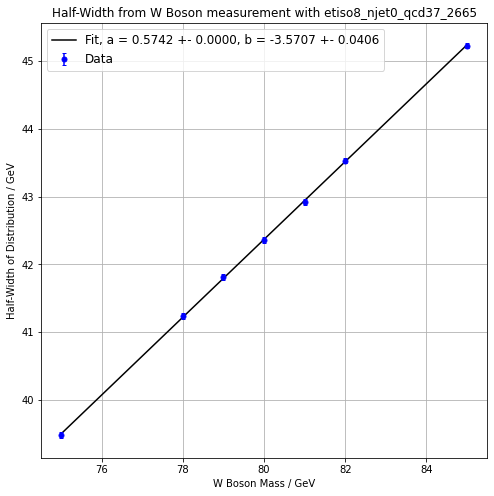

In [39]:
# the main code

# # halfwidth obtained when running ATLAS data with the given cuts
atlas_halfwidth_arr = [
    0., 0., 0., 0., "41.2065 +/- 0.202642 GeV",
    "40.925 +/- 0.931269 GeV", "40.925 +/- 0.931269 GeV",
    "43.183 +/- 0.0578452 GeV"
]
# atlas_halfwidth_arr = [
#     "40.9737 +/- 0.484964 GeV", "41.1398 +/- 0.280774 GeV",
#      "42.6352 +/- 0.0931504 GeV", "42.887 +/- 0.050338 GeV",
#     "42.887 +/- 0.050338 GeV", "41.2065 +/- 0.202642 GeV",
#     "40.925 +/- 0.931269 GeV", "40.925 +/- 0.931269 GeV",
#     "43.183 +/- 0.0578452 GeV"
# ]

# W boson masses
mW_arr = np.array([
    75, 78, 79, 80, 81, 82, 85
])

# create parameter object
params = Parameters()

# choose initial guess as from past reports
params.add("a", value=0.5)
params.add("b", value=1.3)


# read out data
with open(os.path.join(output_dir, "gauge_curve_data.pkl"), "rb") as f:
    data_dict = pickle.load(f)

plot = True

# get parameters for each given set and cut
for i, (config, hws_str) in enumerate(data_dict.items()):
    print("\n Current Configuration: {0}".format(config))

    hw, hw_err = convert_errstr_array(hws_str)

    # perform linear fit
    out = minimize(residual, params, args=(mW_arr, hw, hw_err))

    # get parameter values and errors
    a, a_err = out.params["a"].value, out.covar[0][0]
    b, b_err = out.params["b"].value, out.covar[1][1]

    # also get correlation coefficients
    corr_coeff = out.covar[1][0]

    # print out full fit report if need be
    # print(fit_report(out))

    # plot data with fit

    if i == 0:
        fig, ax = plt.subplots(figsize=(8,8))

        xfit = np.linspace(mW_arr[0], mW_arr[-1], 500)
        yfit = a * xfit + b
        ax.plot(xfit, yfit, label="Fit, a = {0:.4f} +- {1:.4f}, b = {2:.4f} +- {3:.4f}".format(a, a_err, b, b_err), color="k")
        ax.errorbar(mW_arr, hw, yerr=hw_err, label="Data", color="b", marker="o", ls="", ms=5.0, capsize=2.0)

        ax.set_xlabel("W Boson Mass / GeV")
        ax.set_ylabel("Half-Width of Distribution / GeV")
        ax.set_title("Half-Width from W Boson measurement with {0}".format(config))
        ax.grid()
        ax.legend(prop={"size":12})

        # print(out.covar, out.params["a"])


    
    # also convert atlas data from str to float
    # print(atlas_halfwidth_arr[i])
    atlas_hw, atlas_hw_err = convert_errstr_array(atlas_halfwidth_arr[i])

    # get the mass of W boson from obtained halfwidth
    atlas_mW = (atlas_hw - b) / a   # from y = mx +b  => x = (y - b) / a
    hb_err = np.sqrt(atlas_hw_err**2. + b_err**2.)
    atlas_mW_err = atlas_mW * np.sqrt( (a_err / a)**2. + (hb_err / (atlas_hw - b))**2. )
    print("Mass of W boson from ATLAS data: {0:.3f} +- {1:.3f} GeV".format(atlas_mW, atlas_mW_err))

    # compare with accepted value of mW
    mW_accepted = 80.433 

    mW_tval = np.abs(atlas_mW - mW_accepted) / (atlas_mW_err)
    print("W boson mass is {0:.3f} sigma away from accepted value".format(mW_tval))


In [12]:
# check calibration using Z boson mass
# systematic error due to calibration

mZ_data = 91.53801863004914
mZ_true = 91.1876
delta_mZ = mZ_data - mZ_true

# from relative uncertainty dW / W = dZ / Z
mW_data = 80.58185022013751
mW_err_calib = mW_data * delta_mZ / mZ_true
print("Systematic error from calibration: {0} GeV".format(mW_err_calib))

Systematic error from calibration: 0.30966251508938825 GeV


In [ ]:
# # ptw < 10 only, qcd=0.37
# # half_max =np.array([
# #     39.2923, 40.8123, 41.35, 41.9307, 42.5712,  43.1116, 44.5412
# # ])
# # half_max_err =np.array([
# #     0.0657924, 0.0700304, 0.0666937, 0.0749529, 0.0852238, 0.0712354, 0.103191
# # ])

# # ptw < 10, njet == 0, qcd=0.37
# # half_max =np.array([
# #     39.3337, 40.8565, 41.3975,  41.9311, 42.5656,  43.1147, 44.5398
# # ])

# # half_max_err =np.array([
# #      0.0703365, 0.074536, 0.0712035, 0.0781514, 0.0894602, 0.0762419, 0.0924828
# # ])

# # el_etiso < 8, njet == 0, qcd=0.37
# # half_max =np.array([
# #      40.0512, 41.6582, 42.131,  42.7492, 43.3221,  43.7077, 45.3604
# # ])

# # half_max_err =np.array([
# #      0.0511893, 0.0460512, 0.0433276, 0.0485094, 0.0484778, 0.0429815, 0.0472126
# # ])

# # el_etiso < 8, njet == 0, qcd=0.4
# # half_max =np.array([
# #      39.92, 41.5872, 42.1024,  42.656, 43.2608,  43.6906, 45.3482
# # ])

# # half_max_err =np.array([
# #      0.0492164, 0.0467629, 0.0420073, 0.0448077, 0.0474972, 0.0403156, 0.0449381
# # ])
# # data obtained from half-max analysis

# # # no cuts, qcd=0.37
# # errstr_list = [
# #      "37.4208 +/- 0.381072 GeV", "38.8992 +/- 0.701751 GeV", "39.3664 +/- 0.192098 GeV", "39.6832 +/- 0.138895 GeV", 
# #      "40.1344 +/- 0.137097 GeV", " 40.9216 +/- 0.226304 GeV", "42.16 +/- 0.24065 GeV"
# # ]

# # atlas_hw = 41.1603

# # el_etiso < 8, njet == 0, qcd=0.37, region 25 - 70
# # errstr_list = [
# #      " 39.9915 +/- 0.0775079 GeV", "41.6671 +/- 0.0573744 GeV", "42.2112 +/- 0.0543119 GeV",
# #       "42.836 +/- 0.0603719 GeV", "43.3873 +/- 0.0573079 GeV", " 43.7433 +/- 0.0464772 GeV", 
# #      "45.3437 +/- 0.0482791 GeV"
# # ]

# # atlas_hw = 40.925016

# # # el_etiso < 8, njet == 0, qcd=0.37, region 30 - 50
# # errstr_list = [
# #      "40.1927 +/- 0.0520898 GeV", "41.7781 +/- 0.0593492 GeV", "42.2529 +/- 0.0559498 GeV",
# #       "42.8529 +/- 0.0582604 GeV", "43.4729 +/- 0.0673315 GeV", " 43.7813 +/- 0.0601883 GeV", 
# #      "45.4935 +/- 0.0999553 GeV"
# # ]

# atlas_hw = 43.183037

# # el_etiso < 8, njet == 0, qcd=0.37, region 26-65
# # errstr_list = [
# #      "39.4784 +/- 0.0423736 GeV", "41.2451 +/- 0.0444014 GeV", "41.8106 +/- 0.0405521 GeV",
# #       "42.3605 +/- 0.0459407 GeV", "42.9221 +/- 0.0473117 GeV", " 43.5305 +/- 0.0404663 GeV", 
# #      "45.2309 +/- 0.0425886 GeV"
# # ]

# # atlas_hw = 42.887000

# mw =np.array([
#     75, 78, 79, 80, 81, 82, 85
# ])


(0.5266104411046301,
 0.6957929828867329,
 array([[ 1.02802317e-04, -8.14380246e-03],
        [-8.14380246e-03,  6.45873361e-01]]),
 80.68059556128637)

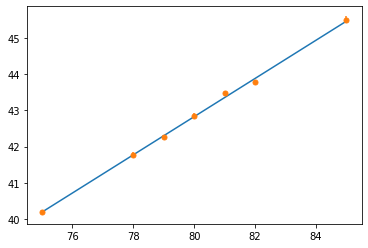

In [84]:
half_max, half_max_err = convert_errstr_array(errstr_list)
get_params(half_max, half_max_err, mw, atlas_hw)

In [85]:
0.5*(80.901748763738 + 80.26195167653701)

80.58185022013751

In [67]:
(a, b), cov = np.polyfit(mw, half_max, deg=1, cov=True, w = 1. / half_max_err)

<ErrorbarContainer object of 3 artists>

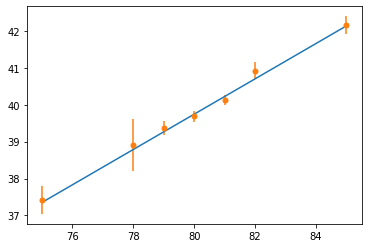

In [68]:
plt.plot(mw, a * mw + b, label="Fit")
plt.errorbar(mw, half_max, yerr=half_max_err, label="data", marker="o", ls="", ms=5.0)

In [69]:
print(a,b)

0.4787593232345003 1.4448534122900802


In [70]:
# print(a, b)

In [71]:
print(cov)

[[ 5.43463960e-04 -4.38224226e-02]
 [-4.38224226e-02  3.53577235e+00]]


In [61]:
# get mass of dataset from half-max obtained from ATLAS data
# print((42.86 - b) / a)
# this is the one with etiso < 8, njet == 0

In [62]:
# get mass of dataset from half-max obtained from ATLAS data
print(( 42.859800 - b) / a)
# one with njet == 0, ptw < 10 (but need to do it again sinec we didnt 
# use correct ATLAS value)

80.26195167653701


In [54]:
80.3878878906251 - 80.28737447587079

0.1005134147543032

In [43]:
print((   48.824768 - b) / a)

91.53801863004914


0.30966251508938825


In [ ]:
# systematic error due to QCD scale factor